## 로이터 뉴스 데이터
프로젝트: Vocabulary Size를 변경해서 시도해보기

In [132]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.9.0
3.6.0
0.13.2
1.22.4
1.5.3
1.3.1


In [133]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 훈련 데이터와 테스트 데이터 로드하기

# 1. 모든 단어 사용

In [418]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [135]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 출력해보기
훈련용 뉴스는 8,982개. 그리고 테스트용 뉴스는 2,246개가 있네요. 8:2의 비율을 가지는데, 첫 번째 훈련용 뉴스와 첫 번째 테스트용 뉴스를 출력해 보겠습니다.

In [136]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

우리는 뉴스 데이터를 다루기로 했는데, 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력됩니다. 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었는데, 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력됩니다.

대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈입니다.

이제 레이블도 출력해 볼까요? 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력해봅시다.

In [137]:
print(y_train[0])
print(y_test[0])

3
3


In [138]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 데이터 분포 확인해보기
자연어 처리 과정에서 문장과 문서들의 길이는 보통 다릅니다. 우리가 평소에 보는 뉴스 기사의 길이가 항상 똑같지는 않죠. 이 데이터도 마찬가지예요. 모든 뉴스 데이터들은 길이가 다 다를 거예요. 뉴스 데이터의 길이 분포를 볼까요?

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


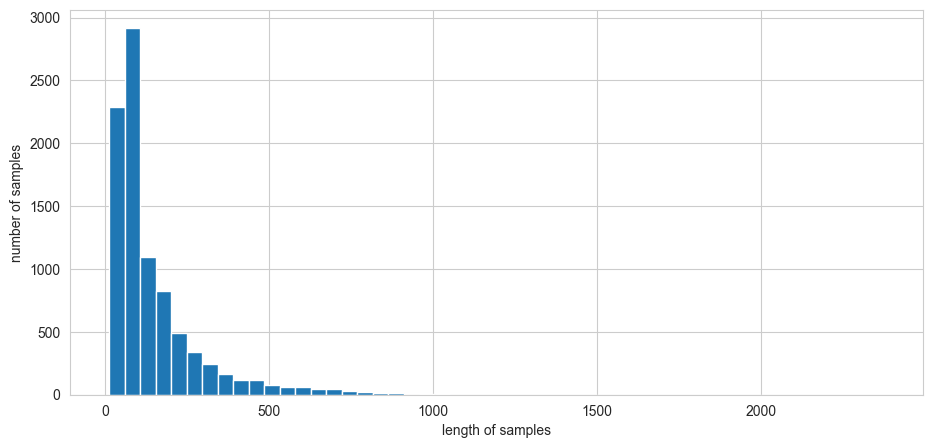

In [139]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

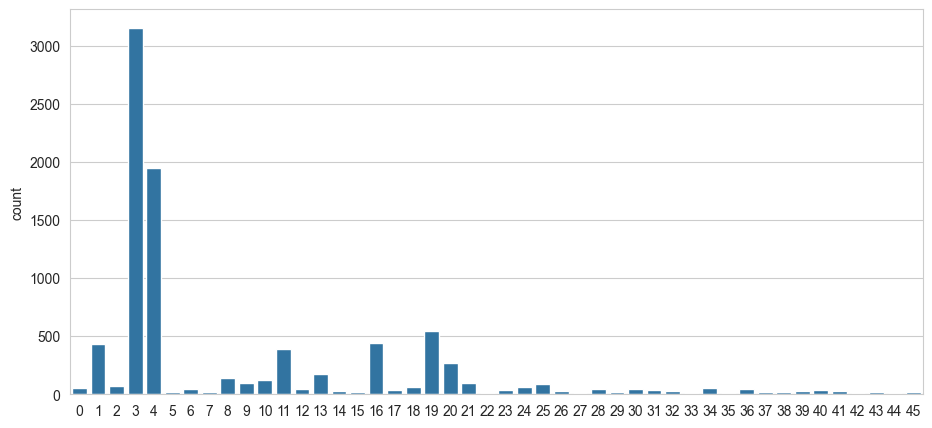

In [140]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [141]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재합니다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많네요. 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 봤어요.

### 데이터 복원하기

In [142]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [143]:
word_index['the']

1

In [144]:
word_index['it']

13

In [145]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [146]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [147]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('=3')

=3


In [148]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### 이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해 보겠습니다.

In [149]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [150]:
#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


각각 5개씩 출력해보고, 제대로 변환이 되었는지 확인해 보겠습니다.

In [151]:
x_train[0]

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [152]:
x_test[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3'

## 벡터화 하기

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [154]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [155]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


## 나이브 베이즈 분류기

In [156]:
# 라이브러리 불러오기

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [157]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [158]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [159]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [160]:
y_test[3]

4

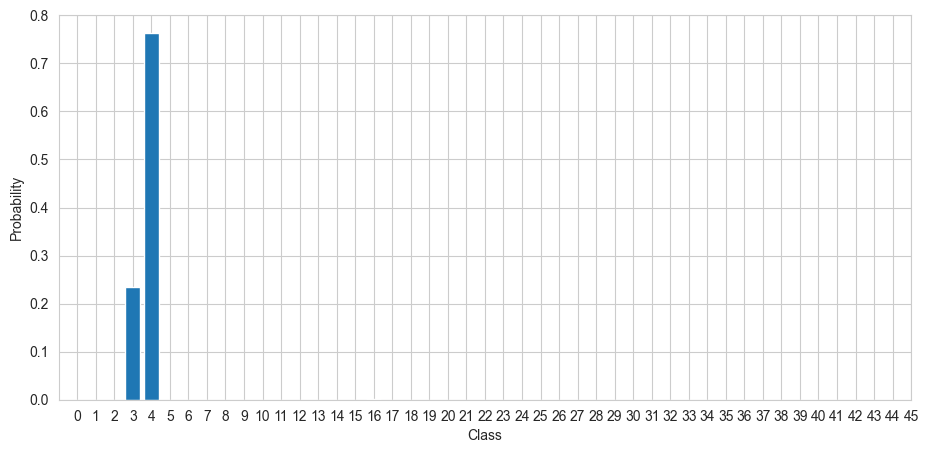

In [161]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [162]:
model.predict(tfidfv_test[3])

array([4])

## F1-Score, Confusion Matrix

In [163]:
# 필요한 라이브러리 불러오기
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print('=3')

=3


In [164]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [165]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


In [397]:
# graph_confusion_matrix(model, tfidfv_test, y_test)

## 다양한 머신러닝 모델 사용해보기 (1)


### Complement Naive Bayes Classifier(CNB)

- 데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것
- 데이터의 불균형을 고려하여 가중치를 부여

In [167]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [168]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


## 모델 구현
- 편의를 위해 함수를 만들었다

### 모델 선정 이유
- 기존의 실험과의 비교를 위해 같은 모델인 logisticRegression, LinearSVC, DecisionTree, RandomForest, GradientBoosting을 사용하였다.
- 5개의 모델 중에서 성능이 좋은 모델을 골라 다시 voting ensemble을 할 예정이다

In [169]:
import joblib

- macro: 클래스별로 동일한 가중치를 부여하여, 클래스 불균형에 관계없이 각 클래스의 성능을 개별적으로 평가하고자 할 때 사용.
- micro: 전체 샘플 수에 기반한 성능 평가로, 전체적인 분류 성능을 보고자 할 때 사용.
- weighted: 클래스별 샘플 수에 기반한 가중 평균으로, 클래스 불균형을 고려하면서 전체 성능을 평가하고자 할 때 사용.

In [170]:
import os
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib

In [171]:
def predict(tfidfv, y_train, model, tfidfv_test, y_test, save_model=False, save_dir=None):
    print('*' * 50)
    print(model.__class__.__name__)
    model.fit(tfidfv, y_train)
    
    predicted = model.predict(tfidfv_test)
    accuracy = accuracy_score(y_test, predicted)
    f1_macro = f1_score(y_test, predicted, average='macro')
    f1_micro = f1_score(y_test, predicted, average='micro')
    f1_weighted = f1_score(y_test, predicted, average='weighted')
    
    print("정확도:", accuracy) #예측값과 실제값 비교
    print("f1 score(macro):", f1_macro)
    print("f1 score(micro):", f1_macro)
    print("f1 score(weighted):", f1_macro)
    
    if save_model and save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        model_filename = os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
        joblib.dump(model, model_filename)
        print(f"Model saved as {model_filename}")
    
    return [accuracy, f1_macro, f1_micro, f1_weighted]

def make_predict_dict(tfidfv, y_train, tfidfv_test, y_test, experiment_name=None):
    # 실험 폴더 생성
    if experiment_name is None:
        experiment_name = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = os.path.join("experiments", experiment_name)
    
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    svc = SVC(C=1000, kernel='linear', probability=True, max_iter=3000)
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    grbt = GradientBoostingClassifier(random_state=0)

    models = [lr, svc, tree, forest, grbt]
    
    pred_dict = {}
    for model in models:
        pred_dict[model.__class__.__name__] = predict(tfidfv, y_train, model, tfidfv_test, y_test, save_model=True, save_dir=save_dir)
        print('-' * 50)
        
    return pred_dict

In [172]:
pred_dict = make_predict_dict(tfidfv, y_train, tfidfv_test, y_test)

**************************************************
LogisticRegression
정확도: 0.8161175422974176
f1 score(macro): 0.6685102013579721
f1 score(micro): 0.6685102013579721
f1 score(weighted): 0.6685102013579721
Model saved as experiments/20240702_221120/LogisticRegression.joblib
--------------------------------------------------
**************************************************
SVC


/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


정확도: 0.8063223508459484
f1 score(macro): 0.6590169558593678
f1 score(micro): 0.6590169558593678
f1 score(weighted): 0.6590169558593678
Model saved as experiments/20240702_221120/SVC.joblib
--------------------------------------------------
**************************************************
DecisionTreeClassifier
정확도: 0.6211041852181657
f1 score(macro): 0.15450055404800783
f1 score(micro): 0.15450055404800783
f1 score(weighted): 0.15450055404800783
Model saved as experiments/20240702_221120/DecisionTreeClassifier.joblib
--------------------------------------------------
**************************************************
RandomForestClassifier
정확도: 0.6544968833481746
f1 score(macro): 0.2794631711818573
f1 score(micro): 0.2794631711818573
f1 score(weighted): 0.2794631711818573
Model saved as experiments/20240702_221120/RandomForestClassifier.joblib
--------------------------------------------------
**************************************************
GradientBoostingClassifier
정확도: 0.770703

In [176]:
def save_experient_df(pred_dict, filename):
    pred_df = pd.DataFrame(pred_dict).T
    pred_df.columns = ['accuracy', 'f1_macro','f1_micro','f1_weighted']
    pred_df = pred_df.sort_values(by='f1_weighted', ascending=False)
    pred_df.to_csv(filename)
    return pred_df

In [177]:
filename = 'experiments/test1/result.csv'
save_experient_df(pred_dict, filename)

,accuracy,f1_macro,f1_micro,f1_weighted
LogisticRegression,0.816118,0.668510,0.816118,0.810661
SVC,0.806322,0.659017,0.806322,0.800247
GradientBoostingClassifier,0.770703,0.573383,0.770703,0.764786
RandomForestClassifier,0.654497,0.279463,0.654497,0.622591
DecisionTreeClassifier,0.621104,0.154501,0.621104,0.576928


In [178]:
def load_model_and_predict(model_filename, tfidfv_test):
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
    
    predictions = loaded_model.predict(tfidfv_test)
    return predictions

In [687]:
def save_model(model, save_dir):
    #save_dir = './experiments/test2/'
    os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
    model_filename = os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
    joblib.dump(model, model_filename)
    print(f'Save to {model_filename}')

## 보팅(Voting)

In [811]:
model_filename = "experiments/test1/LogisticRegression.joblib"
lr = joblib.load(model_filename)

model_filename = "experiments/test1/SVC.joblib"
lsvc = joblib.load(model_filename)

model_filename = "experiments/test1/GradientBoostingClassifier.joblib"
grbt = joblib.load(model_filename)

In [812]:
voting_classifier = VotingClassifier(
    estimators=[('lr', lr), ('cb', lsvc), ('grbt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb',
                              SVC(C=1000, kernel='linear', max_iter=3000,
                                  probability=True)),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [816]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

In [814]:
def get_scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, predicted, average='macro')
    f1_micro = f1_score(y_test, predicted, average='micro')
    f1_weighted = f1_score(y_test, predicted, average='weighted')

    print("정확도:", accuracy)  #예측값과 실제값 비교
    print("f1 score(macro):", f1_macro)
    print("f1 score(micro):", f1_micro)
    print("f1 score(weighted):", f1_weighted)
    return [accuracy, f1_macro, f1_micro, f1_weighted]

In [817]:
scores = get_scores(y_test, predicted)

정확도: 0.8121104185218165
f1 score(macro): 0.656274180472915
f1 score(micro): 0.8121104185218165
f1 score(weighted): 0.8077631209447897


In [818]:
pred_df = pd.read_csv('experiments/test1/result.csv', index_col=0)

In [820]:
voting_classifier.__class__.__name__

'VotingClassifier'

In [821]:
scores

[0.8121104185218165, 0.656274180472915, 0.8121104185218165, 0.8077631209447897]

In [822]:
pred_df.loc[voting_classifier.__class__.__name__] = scores

In [823]:
save_dir = "./experiments/test1/"
save_model(voting_classifier, save_dir)

Save to ./experiments/test1/VotingClassifier.joblib


In [827]:
pred_df = pred_df.sort_values(by='f1_weighted', ascending=False)
pred_df.to_csv('experiments/test1/result.csv')

# 2. 빈도수 상위 5,000개의 단어만 사용

## 벡터화 하기

In [674]:
def decode_data(x):
    decoded = []
    for i in range(len(x)):
        t = ' '.join([index_to_word[index] for index in x[i]])
        decoded.append(t)
    
    return decoded

def make_dataset(x_train, x_test):
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    
    index_to_word = { index+3 : word for word, index in word_index.items() }
    # index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
        index_to_word[index]=token
    
    print('Decoding ...')
    x_train = decode_data(x_train)
    x_test = decode_data(x_test)
    print(len(x_train), len(x_test))
    
    print('Vectorizing ...')
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
    print('Done!')
    return tfidfv, tfidfv_test

In [675]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
tfidfv, tfidfv_test = make_dataset(x_train, x_test)

Decoding ...
8982 2246
Vectorizing ...
Done!


## 모델링

> __사용할 모델__     
> 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [186]:
def predict(tfidfv, y_train, model, tfidfv_test, y_test, save_model=True, save_dir=None):
    #model_name = model.__class__.__name__
    print('*' * 50)
    print(model.__class__.__name__)
    model.fit(tfidfv, y_train)
    
    predicted = model.predict(tfidfv_test)
    accuracy = accuracy_score(y_test, predicted)
    f1_macro = f1_score(y_test, predicted, average='macro')
    f1_micro = f1_score(y_test, predicted, average='micro')
    f1_weighted = f1_score(y_test, predicted, average='weighted')
    
    #if print_scores:
    print("정확도:", accuracy) #예측값과 실제값 비교
    print("f1 score(macro):", f1_macro)
    print("f1 score(micro):", f1_micro)
    print("f1 score(weighted):", f1_weighted)
    
    # 모델 저장
    if save_model and save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        model_filename = os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
        joblib.dump(model, model_filename)
        print(f"Model saved as {model_filename}")
    
    return [accuracy, f1_macro, f1_micro, f1_weighted]

def make_predict_dict(tfidfv, y_train, tfidfv_test, y_test, models, experiment_name):
    # 실험 폴더 생성
    if experiment_name is None:
        experiment_name = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = os.path.join("experiments", experiment_name)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    pred_dict = {}
    for model in models:
        pred_dict[model.__class__.__name__] = predict(tfidfv, y_train, model, tfidfv_test, y_test, save_model=True, save_dir=save_dir)
        print('-' * 50)
        
    return pred_dict

In [187]:
nb = MultinomialNB()
cb = ComplementNB()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
grbt = GradientBoostingClassifier(random_state=0) # verbose=3

models = [nb, cb, lr, lsvc, tree, forest, grbt]

pred_dict = make_predict_dict(tfidfv, y_train, tfidfv_test, y_test, models, experiment_name='test2')

**************************************************
MultinomialNB
정확도: 0.6731967943009796
f1 score(macro): 0.11017286132336847
f1 score(micro): 0.11017286132336847
f1 score(weighted): 0.11017286132336847
Model saved as experiments/test2/MultinomialNB.joblib
--------------------------------------------------
**************************************************
ComplementNB
정확도: 0.7707034728406055
f1 score(macro): 0.48203488372044917
f1 score(micro): 0.48203488372044917
f1 score(weighted): 0.48203488372044917
Model saved as experiments/test2/ComplementNB.joblib
--------------------------------------------------
**************************************************
LogisticRegression
정확도: 0.8032056990204809
f1 score(macro): 0.6526272627015145
f1 score(micro): 0.6526272627015145
f1 score(weighted): 0.6526272627015145
Model saved as experiments/test2/LogisticRegression.joblib
--------------------------------------------------
**************************************************
LinearSVC


/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7724844167408726
f1 score(macro): 0.6123638324806919
f1 score(micro): 0.6123638324806919
f1 score(weighted): 0.6123638324806919
Model saved as experiments/test2/LinearSVC.joblib
--------------------------------------------------
**************************************************
DecisionTreeClassifier
정확도: 0.6179875333926982
f1 score(macro): 0.17794649395239356
f1 score(micro): 0.17794649395239356
f1 score(weighted): 0.17794649395239356
Model saved as experiments/test2/DecisionTreeClassifier.joblib
--------------------------------------------------
**************************************************
RandomForestClassifier
정확도: 0.6999109528049866
f1 score(macro): 0.3580981692119113
f1 score(micro): 0.3580981692119113
f1 score(weighted): 0.3580981692119113
Model saved as experiments/test2/RandomForestClassifier.joblib
--------------------------------------------------
**************************************************
GradientBoostingClassifier
정확도: 0.7684772929652716
f1 score(macr

In [189]:
save_dir = './experiments/test2/result.csv'
pred_df = save_experient_df(pred_dict, save_dir)

In [190]:
pred_df

,accuracy,f1_macro,f1_micro,f1_weighted
LogisticRegression,0.803206,0.652627,0.803206,0.798143
LinearSVC,0.772484,0.612364,0.772484,0.769929
GradientBoostingClassifier,0.768477,0.579889,0.768477,0.767158
ComplementNB,0.770703,0.482035,0.770703,0.745899
RandomForestClassifier,0.699911,0.358098,0.699911,0.675676
MultinomialNB,0.673197,0.110173,0.673197,0.601250
DecisionTreeClassifier,0.617988,0.177946,0.617988,0.572997


In [687]:
def save_model(model, save_dir):
    #save_dir = './experiments/test2/'
    os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
    model_filename = os.path.join(save_dir, f"{model.__class__.__name__}.joblib")
    joblib.dump(model, model_filename)
    print(f'Save to {model_filename}')

## Voting Classifier

In [688]:
model_filename = "experiments/test2/LogisticRegression.joblib"
lr = joblib.load(model_filename)

#model_filename = "experiments/test/SVC.joblib"
lsvc = SVC(C=1000, kernel='linear', probability=True, max_iter=3000)

model_filename = "experiments/test2/GradientBoostingClassifier.joblib"
grbt = joblib.load(model_filename)

In [689]:
save_dir

'./experiments/test2/'

In [690]:
save_model(lsvc, save_dir)

Save to ./experiments/test2/SVC.joblib


In [679]:
voting_classifier = VotingClassifier(
    estimators=[('lr', lr), ('lsvc', lsvc), ('grbt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('lsvc',
                              SVC(C=1000, kernel='linear', max_iter=3000,
                                  probability=True)),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [680]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

In [681]:
scores = get_scores(y_test, predicted)

정확도: 0.8161175422974176
f1 score(macro): 0.6781595649995655
f1 score(micro): 0.8161175422974176
f1 score(weighted): 0.8115506753090028


In [692]:
save_model(voting_classifier, save_dir)

Save to ./experiments/test2/VotingClassifier.joblib


In [694]:
pred_df.loc['VotingClassifier'] = scores

In [695]:
pred_df

,accuracy,f1_macro,f1_micro,f1_weighted
VotingClassifier,0.816118,0.678160,0.816118,0.811551
LogisticRegression,0.806322,0.659969,0.806322,0.802377
SVC,0.803651,0.656854,0.803651,0.797998
GradientBoostingClassifier,0.768477,0.546766,0.768477,0.764871
ComplementNB,0.763134,0.463252,0.763134,0.738027
RandomForestClassifier,0.712378,0.334487,0.712378,0.689111
DecisionTreeClassifier,0.618878,0.152822,0.618878,0.570848
MultinomialNB,0.636242,0.088529,0.636242,0.562385


In [696]:
save_dir

'./experiments/test2/'

In [698]:
pred_df = pred_df.sort_values(by='f1_weighted',ascending=False)
pred_df.to_csv('./experiments/test2/result.csv')

# 3. 직접 단어 개수를 설정해서 사용
위 단계에서 5000으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.

In [727]:
import pandas as pd
from tensorflow.keras.datasets import reuters
from collections import Counter
from itertools import chain
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

# Get the word index mapping from words to their integer indices
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = {index + 3: word for word, index in word_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

# Class별 단어 count를 세고 저장
class_word_counts = {}
for text, label in zip(x_train, y_train):
    if label not in class_word_counts:
        class_word_counts[label] = Counter()
    class_word_counts[label].update(text)

# Convert the counters to DataFrames for easier manipulation
class_word_dfs = {label: pd.DataFrame(word_counts.most_common(), columns=['word', 'count']) 
                  for label, word_counts in class_word_counts.items()}

# 임계치를 설정하고 이를 넘는 단어만 사용
threshold = 10
filtered_words = set(chain.from_iterable(
    df[df['count'] > threshold]['word'] for df in class_word_dfs.values()
))

# 단어 필터링 및 불용어 제거 함수
def filtering_word_index(index_to_word, filtered_words, stop_words):
    print(f'단어 필터링 전 : {len(index_to_word)}')
    filtered_index_to_word = {index: word for index, word in index_to_word.items() if index in filtered_words}
    print(f'단어 필터링 후 : {len(filtered_index_to_word)}')
    if stop_words:
        filtered_index_to_word = {index: word for index, word in filtered_index_to_word.items() if word not in stop_words}
        print(f'stopwords 적용 후 : {len(filtered_index_to_word)}')
    return filtered_index_to_word

filtered_index_to_word = filtering_word_index(index_to_word, filtered_words, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seongyeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


단어 필터링 전 : 30982
단어 필터링 후 : 4282
stopwords 적용 후 : 4162


In [728]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    filtered_index_to_word[index] = token

In [729]:
filtered_word_index = {word: index for index, word in filtered_index_to_word.items()}

In [730]:
# Function to convert indices back to words
def indices_to_text(indices, index_to_word):
    return ' '.join(index_to_word.get(index, '<unk>') for index in indices)

In [732]:
# text = indices_to_text(text, filtered_index_to_word)

In [ ]:
def decode_data(x, filtered_index_to_word):
    decoded = []
    for i in range(len(x)):
        t = indices_to_text(x[i], filtered_index_to_word)
        decoded.append(t)
    return decoded

In [745]:
def make_dataset(x_train, x_test, filtered_index_to_word):
    print('Decoding ...')
    x_train_decoded = decode_data(x_train, filtered_index_to_word)
    x_test_decoded = decode_data(x_test, filtered_index_to_word)
    print(len(x_train_decoded), len(x_test_decoded))
    
    print('Vectorizing ...')
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train_decoded)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dtm = dtmvector.transform(x_test_decoded) # 테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) # DTM을 TF-IDF 행렬로 변환
    print('Done!')
    return tfidfv, tfidfv_test

# Make dataset
tfidfv, tfidfv_test = make_dataset(x_train, x_test, filtered_index_to_word)

Decoding ...
8982 2246
Vectorizing ...
Done!


In [384]:
nb = MultinomialNB()
cb = ComplementNB()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
#lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc = SVC(C=1000, kernel='linear', probability=True, max_iter=3000)
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
grbt = GradientBoostingClassifier(random_state=0) # verbose=3

models = [nb, cb, lr, lsvc, tree, forest, grbt]

pred_dict = make_predict_dict(tfidfv, y_train, tfidfv_test, y_test, models, experiment_name='test3')

**************************************************
MultinomialNB
정확도: 0.6362422083704363
f1 score(macro): 0.0885293191876163
f1 score(micro): 0.0885293191876163
f1 score(weighted): 0.0885293191876163
Model saved as experiments/test3/MultinomialNB.joblib
--------------------------------------------------
**************************************************
ComplementNB
정확도: 0.7631344612644702
f1 score(macro): 0.4632521219013089
f1 score(micro): 0.4632521219013089
f1 score(weighted): 0.4632521219013089
Model saved as experiments/test3/ComplementNB.joblib
--------------------------------------------------
**************************************************
LogisticRegression
정확도: 0.8063223508459484
f1 score(macro): 0.659969105510791
f1 score(micro): 0.659969105510791
f1 score(weighted): 0.659969105510791
Model saved as experiments/test3/LogisticRegression.joblib
--------------------------------------------------
**************************************************
SVC


/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


정확도: 0.8036509349955476
f1 score(macro): 0.6568536297657603
f1 score(micro): 0.6568536297657603
f1 score(weighted): 0.6568536297657603
Model saved as experiments/test3/SVC.joblib
--------------------------------------------------
**************************************************
DecisionTreeClassifier
정확도: 0.6188780053428317
f1 score(macro): 0.1528216046845348
f1 score(micro): 0.1528216046845348
f1 score(weighted): 0.1528216046845348
Model saved as experiments/test3/DecisionTreeClassifier.joblib
--------------------------------------------------
**************************************************
RandomForestClassifier
정확도: 0.7123775601068566
f1 score(macro): 0.33448731247553193
f1 score(micro): 0.33448731247553193
f1 score(weighted): 0.33448731247553193
Model saved as experiments/test3/RandomForestClassifier.joblib
--------------------------------------------------
**************************************************
GradientBoostingClassifier
정확도: 0.7684772929652716
f1 score(macro): 0.

In [385]:
filename = './experiments/test3/result.csv'
save_experient_df(pred_dict, filename)

,accuracy,f1_macro,f1_micro,f1_weighted
LogisticRegression,0.806322,0.659969,0.806322,0.802377
SVC,0.803651,0.656854,0.803651,0.797998
GradientBoostingClassifier,0.768477,0.546766,0.768477,0.764871
ComplementNB,0.763134,0.463252,0.763134,0.738027
RandomForestClassifier,0.712378,0.334487,0.712378,0.689111
DecisionTreeClassifier,0.618878,0.152822,0.618878,0.570848
MultinomialNB,0.636242,0.088529,0.636242,0.562385


In [386]:
pred_df = save_experient_df(pred_dict, filename)

In [701]:
pred_df = pd.read_csv('./experiments/test3/result.csv', index_col=0)

In [702]:
pred_df.index[:3]

Index(['LogisticRegression', 'SVC', 'GradientBoostingClassifier'], dtype='object')

In [703]:
model_filename = "experiments/test3/LogisticRegression.joblib"
lr = joblib.load(model_filename)

model_filename = "experiments/test3/SVC.joblib"
lsvc = joblib.load(model_filename)

model_filename = "experiments/test3/GradientBoostingClassifier.joblib"
grbt = joblib.load(model_filename)

In [704]:
voting_classifier = VotingClassifier(
    estimators=[('lr', lr), ('lsvc', lsvc), ('grbt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('lsvc',
                              SVC(C=1000, kernel='linear', max_iter=3000,
                                  probability=True)),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [705]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

In [706]:
scores = get_scores(y_test, predicted)

정확도: 0.8161175422974176
f1 score(macro): 0.6798524252793823
f1 score(micro): 0.8161175422974176
f1 score(weighted): 0.8116436383961777


In [707]:
pred_df.loc['VotingClassifier'] = scores

In [708]:
pred_df = pred_df.sort_values(by='f1_weighted',ascending=False)
pred_df.to_csv('./experiments/test3/result.csv')

In [709]:
pred_df

,accuracy,f1_macro,f1_micro,f1_weighted
VotingClassifier,0.816118,0.679852,0.816118,0.811644
LogisticRegression,0.806322,0.659969,0.806322,0.802377
SVC,0.803651,0.656854,0.803651,0.797998
GradientBoostingClassifier,0.768477,0.546766,0.768477,0.764871
ComplementNB,0.763134,0.463252,0.763134,0.738027
RandomForestClassifier,0.712378,0.334487,0.712378,0.689111
DecisionTreeClassifier,0.618878,0.152822,0.618878,0.570848
MultinomialNB,0.636242,0.088529,0.636242,0.562385


In [399]:
voting_classifier.__class__.__name__

'VotingClassifier'

In [710]:
save_dir = './experiments/test3/'
save_model(voting_classifier, save_dir)

Save to ./experiments/test3/VotingClassifier.joblib


In [408]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.78      0.76      0.77       105
           2       0.73      0.80      0.76        20
           3       0.92      0.93      0.92       813
           4       0.80      0.87      0.83       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.33      0.50         3
           8       0.63      0.71      0.67        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.68      0.75      0.71        83
          12       0.60      0.46      0.52        13
          13       0.62      0.65      0.63        37
          14       0.50      1.00      0.67         2
          15       0.60      0.33      0.43         9
          16       0.74      0.78      0.76        99
          17       0.73    

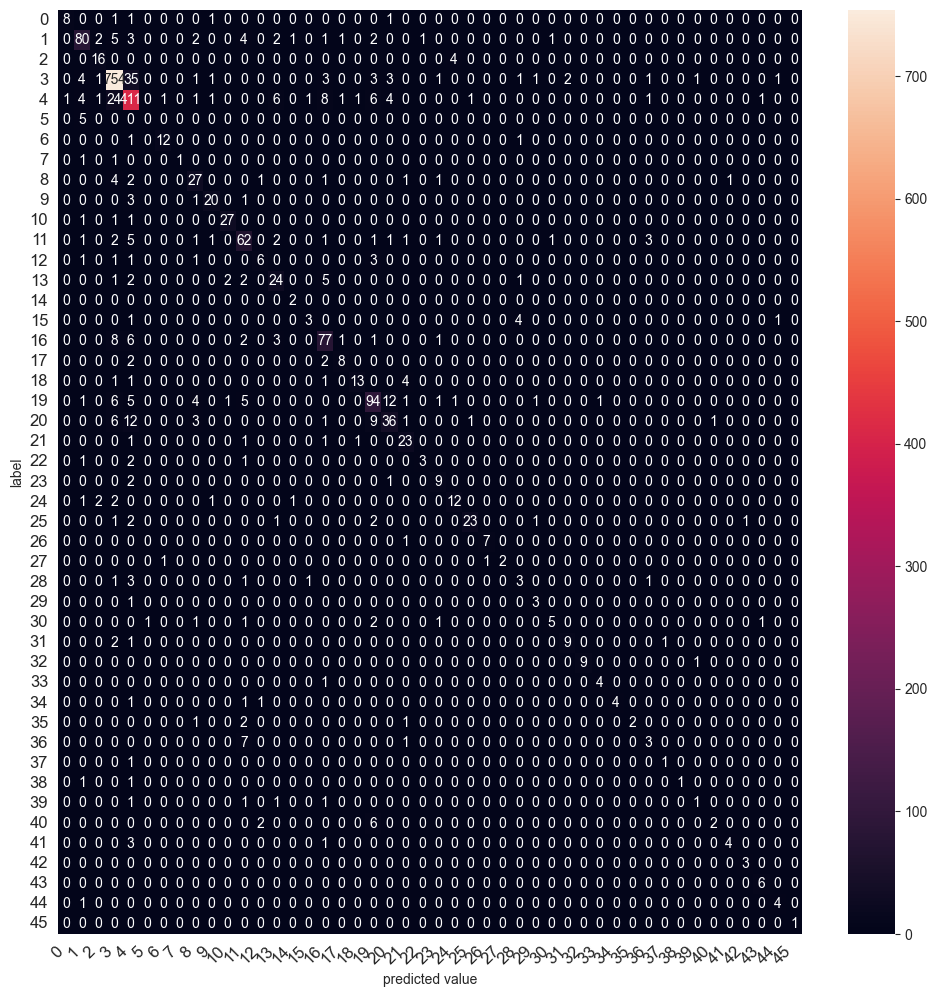

In [409]:
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

# 4. 딥러닝 모델과 비교해 보기

위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

In [429]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [438]:
from keras import models
from keras import layers

In [460]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [755]:
tf.keras.backend.clear_session()

In [769]:
tfidfv

<8982x4070 sparse matrix of type '<class 'numpy.float64'>'
	with 484791 stored elements in Compressed Sparse Row format>

In [770]:
tfidfv_test

<2246x4070 sparse matrix of type '<class 'numpy.float64'>'
	with 121972 stored elements in Compressed Sparse Row format>

## DNN 모델

In [783]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(4070,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [784]:
from sklearn.model_selection import train_test_split

tfidfv_train, tfidfv_val, y_tr, y_val = train_test_split(tfidfv.toarray(), y_train, test_size=0.2, random_state=0)

In [785]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('experiments/h5/fcl_best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [786]:
history = model.fit(tfidfv_train, y_tr, batch_size=100, epochs=20, validation_data=(tfidfv_val, y_val), callbacks=[es, mc])

Epoch 1/20
68/72 [===========================>..] - ETA: 0s - loss: 2.3037 - acc: 0.4590
Epoch 1: val_acc improved from -inf to 0.58375, saving model to fcl_best_model2.h5
72/72 [==============================] - 1s 12ms/step - loss: 2.2722 - acc: 0.4640 - val_loss: 1.6234 - val_acc: 0.5838
Epoch 2/20
64/72 [=========================>....] - ETA: 0s - loss: 1.4644 - acc: 0.6608
Epoch 2: val_acc improved from 0.58375 to 0.71285, saving model to fcl_best_model2.h5
72/72 [==============================] - 1s 8ms/step - loss: 1.4500 - acc: 0.6665 - val_loss: 1.3161 - val_acc: 0.7129
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 1.1634 - acc: 0.7273
Epoch 3: val_acc improved from 0.71285 to 0.73122, saving model to fcl_best_model2.h5
72/72 [==============================] - 1s 8ms/step - loss: 1.1634 - acc: 0.7273 - val_loss: 1.1405 - val_acc: 0.7312
Epoch 4/20
68/72 [===========================>..] - ETA: 0s - loss: 0.9801 - acc: 0.7632
Epoch 4: val_acc improved from 

In [787]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24])

In [788]:
loaded_model = load_model('experiments/h5/fcl_best_model2.h5')
print("\n Test Accuracy: %.4f" % (loaded_model.evaluate(tfidfv_test.toarray(), y_test)[1]))

71/71 [==============================] - 0s 929us/step - loss: 0.9144 - acc: 0.8014

 Test Accuracy: 0.8014


In [791]:
pred = loaded_model.predict(tfidfv_test.toarray())

71/71 [==============================] - 0s 1ms/step


In [796]:
y_pred = np.argmax(pred, axis=1)

In [798]:
scores = get_scores(y_test, y_pred)

정확도: 0.8014247551202137
f1 score(macro): 0.6798524252793823
f1 score(micro): 0.8161175422974176
f1 score(weighted): 0.8116436383961777


In [505]:
def draw_graph(history):
    history_dict = history.history
    try:
        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy']
    except:
        acc = history_dict['acc']
        val_acc = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    fig = plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

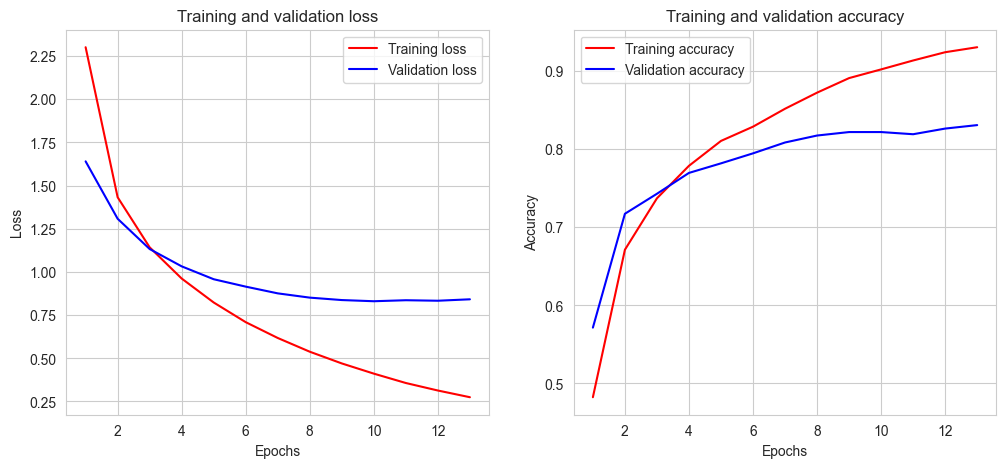

In [506]:
draw_graph(history)

## Lstm 모델

In [663]:
tf.keras.backend.clear_session()

In [664]:
# 모델 학습
def create_lstm_model(input_dim):
    model = Sequential([
        #Embedding(vocab_size, word_vector_dim),
        LSTM(128, activation='tanh', input_shape=(1, input_dim)),
        #LSTM(64, return_sequences=False),
        Dense(46, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model

X = np.expand_dims(tfidfv_train.toarray(), axis=1)
X_val = np.expand_dims(tfidfv_val.toarray(), axis=1)
# 입력 차원 설정
input_dim = X.shape[2]

lstm_model = create_lstm_model(input_dim)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               2149888   
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 2,155,822
Trainable params: 2,155,822
Non-trainable params: 0
_________________________________________________________________


In [538]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('experiments/h5/lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [539]:
stacked_lstm_history = lstm_model.fit(X, y_tr, epochs=20, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/20
222/225 [============================>.] - ETA: 0s - loss: 2.3864 - acc: 0.4585
Epoch 1: val_acc improved from -inf to 0.55760, saving model to lstm_best_model.h5
225/225 [==============================] - 6s 13ms/step - loss: 2.3802 - acc: 0.4590 - val_loss: 1.7042 - val_acc: 0.5576
Epoch 2/20
223/225 [============================>.] - ETA: 0s - loss: 1.4872 - acc: 0.6477
Epoch 2: val_acc improved from 0.55760 to 0.70785, saving model to lstm_best_model.h5
225/225 [==============================] - 4s 16ms/step - loss: 1.4828 - acc: 0.6489 - val_loss: 1.3100 - val_acc: 0.7078
Epoch 3/20
221/225 [============================>.] - ETA: 0s - loss: 1.1383 - acc: 0.7426
Epoch 3: val_acc improved from 0.70785 to 0.76405, saving model to lstm_best_model.h5
225/225 [==============================] - 3s 14ms/step - loss: 1.1369 - acc: 0.7429 - val_loss: 1.0807 - val_acc: 0.7641
Epoch 4/20
224/225 [============================>.] - ETA: 0s - loss: 0.9143 - acc: 0.7990
Epoch 4: val_ac

In [799]:
X_test = np.expand_dims(tfidfv_test.toarray(), axis=1)

In [800]:
loaded_model = load_model('experiments/h5/lstm_best_model.h5')
print("\n Test Accuracy: %.4f" % (loaded_model.evaluate(X_test, y_test_one_hot)[1]))

71/71 [==============================] - 1s 4ms/step - loss: 0.7617 - acc: 0.8313

 Test Accuracy: 0.8313


In [801]:
pred = loaded_model.predict(X_test)

71/71 [==============================] - 1s 3ms/step


In [803]:
y_pred = np.argmax(pred, axis=1)

In [805]:
scores = get_scores(y_test, y_pred)

정확도: 0.8312555654496884
f1 score(macro): 0.6798524252793823
f1 score(micro): 0.8161175422974176
f1 score(weighted): 0.8116436383961777


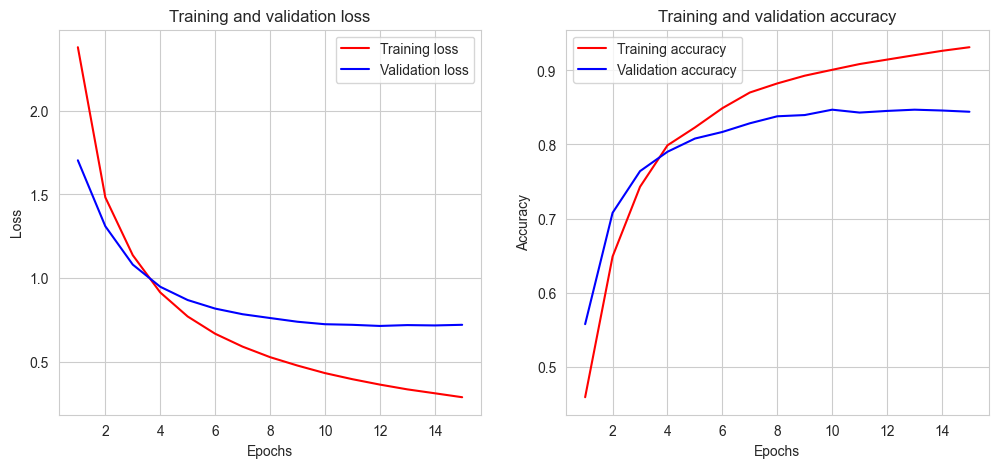

In [543]:
draw_graph(stacked_lstm_history)

## tf-idf 적용안하고 lstm

In [576]:
x_tr_decoded = decode_data(x_train, filtered_index_to_word)
x_te_decoded = decode_data(x_test, filtered_index_to_word)

In [577]:
x_tr_decoded[0]

'<sos> <unk> <unk> said <unk> <unk> result <unk> <unk> december acquisition <unk> <unk> co <unk> expects earnings per share <unk> 1987 <unk> 1 15 <unk> 1 30 dlrs per share <unk> <unk> 70 cts <unk> 1986 <unk> company said pretax net <unk> rise <unk> nine <unk> 10 mln dlrs <unk> six mln dlrs <unk> 1986 <unk> <unk> operation revenues <unk> 19 <unk> 22 mln dlrs <unk> 12 5 mln dlrs <unk> said cash flow per share <unk> year <unk> <unk> 2 50 <unk> three dlrs reuter 3'

In [661]:
# x_train[0]

In [582]:
# Function to replace words not in the filtered list with index 2 (<UNK>)
def replace_words_with_filtered_indices(text, filtered_word_index):
    return [filtered_word_index.get(word, 2) for word in text.split()]

In [660]:
# replace_words_with_filtered_indices(x_tr_decoded[0], filtered_word_index)

In [588]:
def encode_data(x, filtered_word_index):
    encoded = []
    for i in range(len(x)):
        t = replace_words_with_filtered_indices(x[i], filtered_word_index)
        encoded.append(t)
    return encoded

In [589]:
x_tr_decoded[0]

'<sos> <unk> <unk> said <unk> <unk> result <unk> <unk> december acquisition <unk> <unk> co <unk> expects earnings per share <unk> 1987 <unk> 1 15 <unk> 1 30 dlrs per share <unk> <unk> 70 cts <unk> 1986 <unk> company said pretax net <unk> rise <unk> nine <unk> 10 mln dlrs <unk> six mln dlrs <unk> 1986 <unk> <unk> operation revenues <unk> 19 <unk> 22 mln dlrs <unk> 12 5 mln dlrs <unk> said cash flow per share <unk> year <unk> <unk> 2 50 <unk> three dlrs reuter 3'

In [590]:
x_tr_encoded = encode_data(x_tr_decoded, filtered_word_index)
x_te_encoded = encode_data(x_te_decoded, filtered_word_index)

In [659]:
# x_tr_encoded

In [593]:
num_tokens = [len(tokens) for tokens in x_tr_encoded]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print(f'설정 최대 길이: {maxlen}')
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 설정값인 {maxlen}에 포함됩니다.')

토큰 길이 평균: 145.5398574927633
토큰 길이 최대: 2376
토큰 길이 표준편차: 145.81413013409278
설정 최대 길이: 437
전체 문장의 0.9445557782231129%가 설정값인 437에 포함됩니다.


In [594]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [602]:
max_len = 600
below_threshold_len(max_len, x_tr_encoded)

전체 샘플 중 길이가 600 이하인 샘플의 비율: 97.68425740369628


In [603]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [618]:
x_tr_pad = pad_sequences(x_tr_encoded, padding='pre', maxlen=max_len)
x_te_pad = pad_sequences(x_te_encoded, padding='pre', maxlen=max_len)

In [619]:
len(filtered_index_to_word)

4164

In [641]:
np.max(list(filtered_index_to_word.keys()))

7944

In [620]:
x_tr_pad.shape

(8982, 600)

In [621]:
y_train.shape

(8982,)

In [622]:
x_tr_pad, x_val_pad, y_tr, y_val = train_test_split(x_tr_pad, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

In [647]:
# 모델 학습
def create_lstm_model(vocab_size, word_vector_dim):
    model = Sequential([
        Embedding(vocab_size, word_vector_dim, input_shape=(None,)),
        LSTM(128, activation='tanh'),
        #LSTM(64, return_sequences=False),
        Dense(46, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model

vocab_size = 7945
word_vector_dim = 300

lstm_model = create_lstm_model(vocab_size, word_vector_dim)
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         2383500   
                                                                 
 lstm_5 (LSTM)               (None, 128)               219648    
                                                                 
 dense_5 (Dense)             (None, 46)                5934      
                                                                 
Total params: 2,609,082
Trainable params: 2,609,082
Non-trainable params: 0
_________________________________________________________________


In [648]:
y_tr_one_hot = to_categorical(y_tr)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

In [649]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('experiments/h5/new_lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [650]:
lstm_history = lstm_model.fit(x_tr_pad, y_tr_one_hot, epochs=20, validation_data=(x_val_pad, y_val_one_hot), callbacks=[es, mc])

Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 2.0815 - acc: 0.4718
Epoch 1: val_acc improved from -inf to 0.55481, saving model to new_lstm_best_model.h5
225/225 [==============================] - 211s 924ms/step - loss: 2.0815 - acc: 0.4718 - val_loss: 1.8238 - val_acc: 0.5548
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 1.6888 - acc: 0.5758
Epoch 2: val_acc improved from 0.55481 to 0.59711, saving model to new_lstm_best_model.h5
225/225 [==============================] - 135s 601ms/step - loss: 1.6888 - acc: 0.5758 - val_loss: 1.5922 - val_acc: 0.5971
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 1.4648 - acc: 0.6277
Epoch 3: val_acc improved from 0.59711 to 0.63050, saving model to new_lstm_best_model.h5
225/225 [==============================] - 145s 644ms/step - loss: 1.4648 - acc: 0.6277 - val_loss: 1.4519 - val_acc: 0.6305
Epoch 4/20
225/225 [==============================] - ETA: 0s - loss: 1.2938 - acc: 0

In [651]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (lstm_model.evaluate(x_te_pad, y_test_one_hot)[1]))

71/71 [==============================] - 15s 217ms/step - loss: 1.2830 - acc: 0.7320

 Test Accuracy: 0.7320


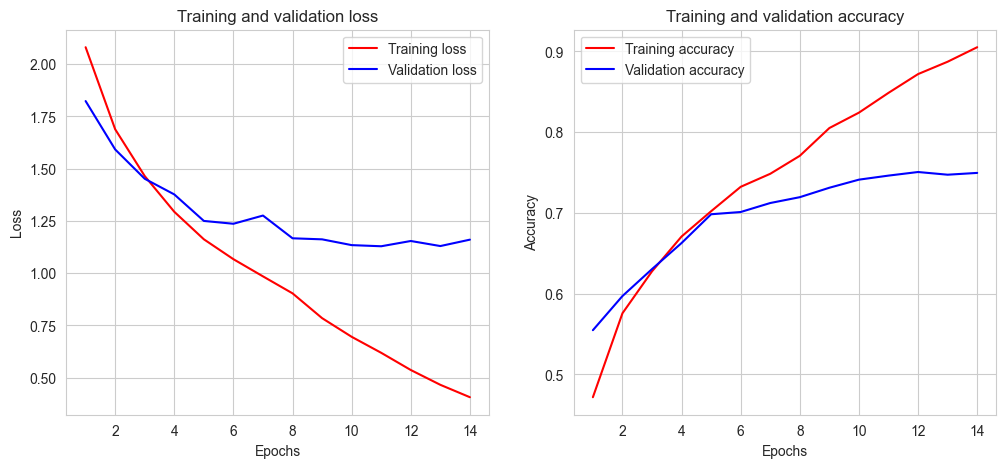

In [652]:
draw_graph(lstm_history)

In [807]:
lstm_model = load_model('experiments/h5/new_lstm_best_model.h5')
pred = lstm_model.predict(x_te_pad)

71/71 [==============================] - 20s 252ms/step


In [809]:
y_pred = np.argmax(pred, axis=1)

In [810]:
scores = get_scores(y_test, y_pred)

정확도: 0.7297417631344613
f1 score(macro): 0.6798524252793823
f1 score(micro): 0.8161175422974176
f1 score(weighted): 0.8116436383961777


In [828]:
pred_df

,accuracy,f1_macro,f1_micro,f1_weighted
LogisticRegression,0.816118,0.668510,0.816118,0.810661
VotingClassifier,0.812110,0.656274,0.812110,0.807763
SVC,0.806322,0.659017,0.806322,0.800247
GradientBoostingClassifier,0.770703,0.573383,0.770703,0.764786
RandomForestClassifier,0.654497,0.279463,0.654497,0.622591
DecisionTreeClassifier,0.621104,0.154501,0.621104,0.576928


# 5. 결과 총 정리
## 성능 비교 표

| 모델 종류                 | 데이터 전처리 방식                           | 정확도        | F1 score (macro) | F1 score (micro) | F1 score (weighted) |
|-----------------------|---------------------------------------------|------------|------------------|------------------|---------------------|
| LogisticRegression    | 모든 단어 사용                              | 0.8161     | 0.6685           | 0.8161           | 0.8107              |
| VotingClassifier      | 모든 단어 사용                              | 0.8121     | 0.6562           | 0.8121           | 0.8077              |
| VotingClassifier      | 상위 5000개 단어 사용                       | 0.8161     | 0.6782           | 0.8161           | 0.8116              |
| VotingClassifier      | 클래스별로 frequency 10개 이상 단어 필터링  | 0.8161     | 0.6799           | 0.8161           | 0.8116              |
| Dense 레이어             | 클래스별로 frequency 10개 이상 단어 필터링  | 0.8014     | 0.6799           | 0.8161           | 0.8116              |
| LSTM 모델               | 클래스별로 frequency 10개 이상 단어 필터링  | **0.8313** | 0.6799           | 0.8161           | 0.8116              |
| LSTM 모델 (tf-idf 사용안함) | 클래스별로 frequency 10개 이상 단어 필터링  | 0.7297     | 0.6799           | 0.8161           | 0.8116              |

      
                  
## 해석
1. VotingClassifier 모델:

    - 모든 단어를 사용한 경우: 
        - 정확도 0.8121, F1 score (weighted) 0.8077로 나타났다. 
        - 빈도가 적은 단어는 성능에 영향을 미치지 못한다.
        - voting ensemble이 오히려 좋은 성능을 내지 못한다.(LogisticRegression 의 성능이 더 좋음)
    - 상위 5000개 단어를 사용한 경우: 
        - 오히려 정확도도 0.8161로 소폭 증가하고, F1 score (weighted)도 0.8116로 향상되었다. 
        - 이는 중요한 단어만을 사용하여 모델의 성능을 최적화한 결과이다.
    - 클래스별로 frequency 10개 이상인 단어를 사용한 경우: 
        - 정확도는 0.8161로, 상위 5000개 단어를 사용한 경우와 비슷한 성능을 보였다. 
        - 이는 단어 빈도가 중요한 역할을 한다는 것을 알 수있다.

2. Dense 레이어 모델:

    - 모든 단어를 사용한 경우: 
        - 정확도는 0.8014로 VotingClassifier 모델보다 낮았지만, F1 score (weighted)는 0.8116로 높은 성능을 보다. 
        - 이는 Dense 레이어가 TF-IDF 벡터화된 데이터를 잘 처리할 수 있음을 보여준다.

3. LSTM 모델:

    - 모든 단어를 사용한 경우: 정확도 0.8313으로 가장 높은 성능을 기록했다. 
    - LSTM은 시퀀스 데이터를 처리할 때 우수한 성능을 발휘하는데, TF-IDF 벡터화된 데이터도 효과적으로 처리할 수 있음을 보여준다.
    - 클래스별로 frequency 10개 이상 단어를 필터링한 후: 
        - 정확도는 0.7297로 떨어졌다. 
        - 이는 단어 필터링이 오히려 LSTM 모델의 성능을 저하시키는 결과를 초래했음을 의미한다.
        - 결론적으로 classification 문제이니까 문장 자체의 의미적인 앞뒤 맥락보다 단어의 존재 유무가 구분의 중요한 요소였던 것 같다. 
        - 이에 따라 tf-idf 벡터화 한 모델이 더 성능이 좋았다 
       
## 결론
- LSTM 모델: 모든 단어를 사용했을 때 가장 높은 정확도(0.8313)를 기록하였다.
- VotingClassifier 모델: 중요한 단어만 사용했을 때 높은 F1 score (weighted)를 기록하였으며, 이는 모델의 성능을 최적화하는 데 효과적임을 보여준다.
- Dense 레이어 모델: 비교적 높은 F1 score (weighted)를 기록하여 TF-IDF 벡터화된 데이터를 효과적으로 처리할 수 있음을 보여준다.
따라서, 텍스트 분류 문제에서는 LSTM 모델이 특히 강력한 성능을 보일 수 있으며, 단어의 중요도에 따라 데이터를 적절히 전처리하면 성능 향상에 도움이 될 수 있다.

# 6. 회고
- 배운 점 
    - 여러가지 실험을 해보면서 코드를 정리하고 모델을 저장하고 성능 비교를 위해 정리하는 방법을 배울 수 있었다
		- task에 따라서 어떤 모델이 성능이 좋은지는 직접 해보고 판단하는 것이 좋다
- 아쉬운 점 
    - 초반에 코드를 잘 정리하지 못해서 아쉽다
    - model shape를 맞추고 변수명을 잘 정리해둬야 재사용이 용이하다
- 느낀 점
    - task 별로 성능이 좋은 모델, 토큰화 방식이 다를 수 있다.
    - 머신러닝, lstm은 느리다
    - 돌리는 시간이 너무 오래걸려서 마음이 급해서 냅다 돌리고 봤는데 좀 더 일관성있게 코드를 함수화 한뒤에 코드를 돌리는게 더 좋을 것 같다(한 번에 정확하게)
- 어려웠던 점 
    - 코드를 좀 더 재사용성있게 짜는 방법을 더 고민해봐야겠다 